<br />

<div style="text-align: center;">
<font size="7">Linear Interpolation</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">Taneaki Mori</font>
</div>

<br />

<br />

<div style="text-align: left;">
<font size="4">Linear Interpolation code: https://github.com/taneaki/Interpolations.jl/blob/master/lin_int.jl</font>
</div>

<br />

<br />

<div style="text-align: left;">
<font size="5">1.補間関数</font>
</div>

<br />

In [1]:
;cmd /c type lin_int.jl 

In [2]:
include("lin_int.jl")

lin_int (generic function with 1 method)

In [3]:
grid =[1, 2, 3, 4, 5, 6, 7, 8]
vals = [2, 0, 4, -1, 3, 7, 3, 10]
f = lin_int(grid,vals)

f([0,1, 2.7, 7.5, 8.1])

5-element Array{Any,1}:
  "error"
 2.0     
 2.8     
 6.5     
  "error"

<br />

<div style="text-align: left;">
<font size="5">2.残差関数</font>
</div>

<br />

In [4]:
g(x) = 2 .* cos(6x) .+ sin(14x) .+ 2.5

g (generic function with 1 method)

<br />

<div style="text-align: left;">
<font size="4">線形補間の精度によって残差がどのように変化するかを見てみる。</font>
</div>

<br />

In [21]:
units = [.25, .2, .1]
grids = [0:unit:1 for unit in units]
interps = [lin_int(grid, g(grid)) for grid in grids]
residuals = [x -> g(x) - interp(x) for interp in interps]
x =(1:99)/100

0.01:0.01:0.99

<br />

<div style="text-align: left;">
<font size="5">3.プロット</font>
</div>

<br />

<br />

<div style="text-align: left;">
<font size="4">頻度の違いによる線形補間の違い。</font>
</div>

<br />

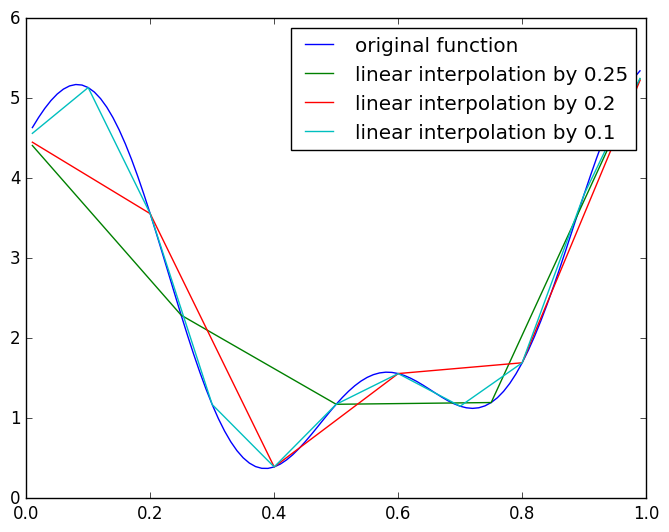

PyObject <matplotlib.legend.Legend object at 0x000000001C1426D8>

In [23]:
using PyPlot
plot(x, g(x), label="original function")
for (interp, unit) in zip(interps, units)
    plot(x, interp(x), label="linear interpolation by $(unit)")
end
legend()


<br />

<div style="text-align: left;">
<font size="4">頻度の違いによる残差の違い。</font>
</div>

<br />

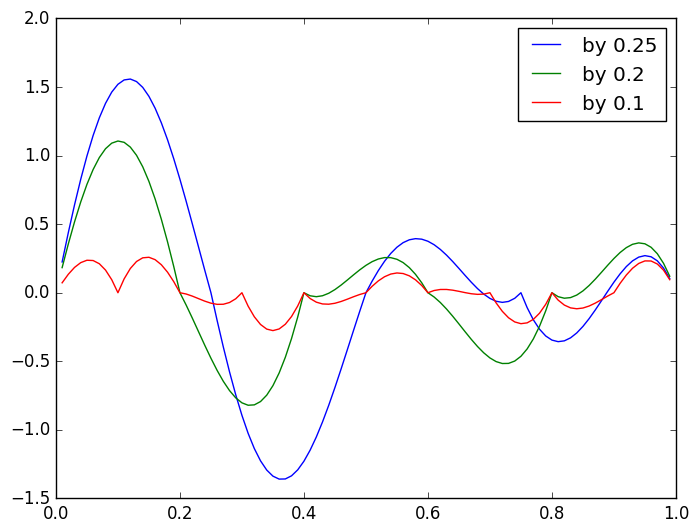

PyObject <matplotlib.legend.Legend object at 0x000000001C197DA0>

In [24]:
using PyPlot
for (residual, unit) in zip(residuals, units)
    plot(x, residual(x), label="by $(unit)")
end
legend()